## Analyzing Pre and Post COVID patterns in U.S. Human Trafficking Cases Using Statistical Analysis and Machine Learning  

### D502 Data Analytics Capstone  

#### Hypothesis:  
There is a statistically significant difference in the distribution of trafficking characteristics, such as type of exploitation, means of control, and recruitment relationships, between the pre-COVID (2002-2019) and post-COVID (2020-2023) cases documented in the United States.

The following code will be used to analyze if the hypothesis should be accepted or rejected.

Let's start by importing our libraries.

In [188]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from sklearn.preprocessing import OneHotEncoder

Now let's read in our dataset and take a look at some characteristics of our data.

NOTE:  The dataset was downloaded on January 2, 2026 as a .csv file from the Counter-Trafficking Data Collaborative (CTDC) Global Synthetic Dataset found here
https://www.ctdatacollaborative.org/page/global-synthetic-dataset

Additional resources pertaining to this file will also be used as I navigate this data.  Primarily the Dataset Codebook and Data Dictionary found on the same URL.

In [133]:
df = pd.read_csv("data_files/CTDC_global_synthetic_data_v2025.csv")

In [134]:
df.shape

(257969, 27)

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257969 entries, 0 to 257968
Data columns (total 27 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   yearOfRegistration                222751 non-null  float64
 1   gender                            205148 non-null  object 
 2   ageBroad                          137139 non-null  object 
 3   citizenship                       126643 non-null  object 
 4   CountryOfExploitation             202006 non-null  object 
 5   traffickMonths                    23512 non-null   object 
 6   meansDebtBondageEarnings          38725 non-null   float64
 7   meansThreats                      46655 non-null   float64
 8   meansAbusePsyPhySex               57647 non-null   float64
 9   meansFalsePromises                27375 non-null   float64
 10  meansDrugsAlcohol                 12890 non-null   float64
 11  meansDenyBasicNeeds               48072 non-null   f

In [136]:
df.head(15)

,yearOfRegistration,gender,ageBroad,citizenship,CountryOfExploitation,traffickMonths,meansDebtBondageEarnings,meansThreats,meansAbusePsyPhySex,meansFalsePromises,...,typeOfLabourAgriculture,typeOfLabourConstruction,typeOfLabourDomesticWork,typeOfLabourHospitality,typeOfSexProstitution,typeOfSexPornography,recruiterRelationIntimatePartner,recruiterRelationFriend,recruiterRelationFamily,recruiterRelationOther
0,2015.0,Man,30--38,UKR,RUS,13--24 (1-2 yrs),1.0,1.0,1.0,1.0,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,2015.0,Man,30--38,UKR,RUS,13--24 (1-2 yrs),1.0,1.0,1.0,1.0,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2,2015.0,Man,30--38,UKR,RUS,13--24 (1-2 yrs),1.0,1.0,1.0,1.0,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
3,2015.0,Man,30--38,UKR,RUS,13--24 (1-2 yrs),1.0,1.0,1.0,1.0,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
4,2015.0,Man,30--38,UKR,RUS,13--24 (1-2 yrs),1.0,1.0,1.0,1.0,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
5,2015.0,Man,30--38,UKR,RUS,13--24 (1-2 yrs),1.0,1.0,1.0,1.0,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
6,2015.0,Man,30--38,UKR,RUS,13--24 (1-2 yrs),1.0,1.0,1.0,1.0,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
7,2015.0,Man,30--38,UKR,RUS,13--24 (1-2 yrs),1.0,1.0,1.0,1.0,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
8,2015.0,Man,30--38,UKR,RUS,13--24 (1-2 yrs),1.0,1.0,1.0,1.0,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
9,2015.0,Man,30--38,UKR,RUS,13--24 (1-2 yrs),1.0,1.0,1.0,1.0,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


The information above, as well as the data codebook, shows that all columns from 6-26 are comprised of 1 for true and null for false.  Let's clean that up and replace null values across columns 6-26.  Let's also update the data type from float to boolean to free up disk space.

In [137]:
# Define cols as columns from index 6 to 26 (inclusive) and convert to boolean

cols = df.columns[6:27]
df[cols] = df[cols].fillna(0).astype(bool)

In [138]:
# Let's take a look at .info() again to confirm changes

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257969 entries, 0 to 257968
Data columns (total 27 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   yearOfRegistration                222751 non-null  float64
 1   gender                            205148 non-null  object 
 2   ageBroad                          137139 non-null  object 
 3   citizenship                       126643 non-null  object 
 4   CountryOfExploitation             202006 non-null  object 
 5   traffickMonths                    23512 non-null   object 
 6   meansDebtBondageEarnings          257969 non-null  bool   
 7   meansThreats                      257969 non-null  bool   
 8   meansAbusePsyPhySex               257969 non-null  bool   
 9   meansFalsePromises                257969 non-null  bool   
 10  meansDrugsAlcohol                 257969 non-null  bool   
 11  meansDenyBasicNeeds               257969 non-null  b

I will be narrowing down the CountryOfExploitation to the United States.  The CodeBook tells me this is where the "victim is first
supported/assisted, identified and/or referred."  This will give me victims identified from within the United States, regardless of their citizenship. 

Let's check to see if there are any anomalies in how to identify the United States.

In [139]:
# Get unique values in 'CountryOfExploitation' column

unique_countries = df['CountryOfExploitation'].unique()
print(unique_countries)

['RUS' 'KAZ' 'POL' nan 'UKR' 'LBN' 'USA' 'BGD' 'LBY' 'IDN' 'TUR' 'JOR'
 'MLI' 'SAU' 'MYS' 'MMR' 'OMN' 'ARE' 'PHL' 'CHN' 'EGY' 'GRC' 'BDI' 'NGA'
 'HTI' 'KHM' 'THA' 'BLR' 'IRQ' 'TUN' 'UGA' 'ZAF' 'ITA' 'ARG' 'CHE' 'JPN'
 'MAR' 'AFG' 'GHA' 'HKG' 'KGZ' 'MDA' 'QAT' 'PRT' 'SWE' 'KEN' 'MKD' 'SRB'
 'BIH' 'ROU' 'CZE' 'IND' 'CIV' 'MEX' 'ESP' 'GBR' 'COL' 'DEU' 'KWT' 'NER'
 'SLE' 'VNM' 'DNK' 'ALB' 'BGR' 'SEN' 'SDN' 'CAN' 'ETH' 'TJK' 'UZB' 'NLD']


This shows I should filter by 'USA' and there are no other anomalies to consider in that column.

In [140]:
# Filter dataframe for entries where 'CountryOfExploitation' is 'USA'

usa_data = df[df['CountryOfExploitation'] == 'USA']

In [141]:
# Look at the shape of the filtered data

usa_data.shape

(116448, 27)

In [142]:
# Look at the first 20 rows of the filtered data

usa_data.head(20)

,yearOfRegistration,gender,ageBroad,citizenship,CountryOfExploitation,traffickMonths,meansDebtBondageEarnings,meansThreats,meansAbusePsyPhySex,meansFalsePromises,...,typeOfLabourAgriculture,typeOfLabourConstruction,typeOfLabourDomesticWork,typeOfLabourHospitality,typeOfSexProstitution,typeOfSexPornography,recruiterRelationIntimatePartner,recruiterRelationFriend,recruiterRelationFamily,recruiterRelationOther
1659,2016.0,Man,NaN,MEX,USA,NaN,True,True,True,True,...,True,False,False,False,False,False,False,False,False,True
1660,2016.0,Man,NaN,MEX,USA,NaN,True,True,True,True,...,True,False,False,False,False,False,False,False,False,True
1661,2016.0,Man,NaN,MEX,USA,NaN,True,True,True,True,...,True,False,False,False,False,False,False,False,False,True
1662,2016.0,Man,NaN,MEX,USA,NaN,True,True,True,True,...,True,False,False,False,False,False,False,False,False,True
1663,2016.0,Man,NaN,MEX,USA,NaN,True,True,True,True,...,True,False,False,False,False,False,False,False,False,True
1664,2016.0,Man,NaN,MEX,USA,NaN,True,True,True,True,...,True,False,False,False,False,False,False,False,False,True
1665,2016.0,Man,NaN,MEX,USA,NaN,True,True,True,True,...,True,False,False,False,False,False,False,False,False,True
1666,2016.0,Man,NaN,MEX,USA,NaN,True,True,True,True,...,True,False,False,False,False,False,False,False,False,True
1667,2016.0,Man,NaN,MEX,USA,NaN,True,True,True,True,...,True,False,False,False,False,False,False,False,False,True
1668,2016.0,Man,NaN,MEX,USA,NaN,True,True,True,True,...,True,False,False,False,False,False,False,False,False,True


In [143]:
# Get unique values in 'CountryOfExploitation' column to ensure only USA is present

unique_countries = usa_data['CountryOfExploitation'].unique()
print(unique_countries)

['USA']


This confirms I have filtered down to just 'USA' as the Country of Exploitation and I am now dealing with 116,448 rows.

Let's take a look at the info again to identify additional areas to clean up.

In [144]:
usa_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 116448 entries, 1659 to 255650
Data columns (total 27 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   yearOfRegistration                109412 non-null  float64
 1   gender                            96807 non-null   object 
 2   ageBroad                          47724 non-null   object 
 3   citizenship                       25831 non-null   object 
 4   CountryOfExploitation             116448 non-null  object 
 5   traffickMonths                    135 non-null     object 
 6   meansDebtBondageEarnings          116448 non-null  bool   
 7   meansThreats                      116448 non-null  bool   
 8   meansAbusePsyPhySex               116448 non-null  bool   
 9   meansFalsePromises                116448 non-null  bool   
 10  meansDrugsAlcohol                 116448 non-null  bool   
 11  meansDenyBasicNeeds               116448 non-null  boo

My initial hypothesis will not require the use of the following features:  
* gender  
* ageBroad  
* citizenship  
* traffickMonths  

However, with only 4 features, I'm not concerned about disk space, and I might possibly want to use them later.  I am choosing
to keep these features for now.  

My next task is to add a helper column to denote pre and post COVID years.  
yearOfRegistration <= 2019  will be "pre-COVID"  
yearOfRegistration >= 2020  will be "post-COVID"  

But first, let's drop the null rows as the year is vital to answering my hypothesis and cannot be inferred by any other feature.

In [145]:
# Drop rows where 'YearOfExploitationStart' is NaN

usa_data = usa_data.dropna(subset=['yearOfRegistration'])

In [146]:
# Verify rows were dropped

usa_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 109412 entries, 1659 to 255650
Data columns (total 27 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   yearOfRegistration                109412 non-null  float64
 1   gender                            90770 non-null   object 
 2   ageBroad                          43355 non-null   object 
 3   citizenship                       21627 non-null   object 
 4   CountryOfExploitation             109412 non-null  object 
 5   traffickMonths                    42 non-null      object 
 6   meansDebtBondageEarnings          109412 non-null  bool   
 7   meansThreats                      109412 non-null  bool   
 8   meansAbusePsyPhySex               109412 non-null  bool   
 9   meansFalsePromises                109412 non-null  bool   
 10  meansDrugsAlcohol                 109412 non-null  bool   
 11  meansDenyBasicNeeds               109412 non-null  boo

In [147]:
# Get unique values in 'yearOfRegistration' column to ensure the correct way to categorize pre- and post-COVID

unique_years = usa_data['yearOfRegistration'].unique()
print(unique_years)

[2016. 2017. 2018. 2019. 2020. 2021. 2022. 2015. 2023. 2008. 2009. 2010.
 2013. 2014. 2002. 2004. 2005. 2007. 2012.]


In [148]:
# Add helper column to denote pre-COVID and post-COVID based on 'yearOfRegistration'

usa_data['period'] = usa_data['yearOfRegistration'].apply(lambda x: 'pre-COVID' if x <= 2019 else 'post-COVID')

In [149]:
# Verify new column is added correctly

usa_data.head(10)

,yearOfRegistration,gender,ageBroad,citizenship,CountryOfExploitation,traffickMonths,meansDebtBondageEarnings,meansThreats,meansAbusePsyPhySex,meansFalsePromises,...,typeOfLabourConstruction,typeOfLabourDomesticWork,typeOfLabourHospitality,typeOfSexProstitution,typeOfSexPornography,recruiterRelationIntimatePartner,recruiterRelationFriend,recruiterRelationFamily,recruiterRelationOther,period
1659,2016.0,Man,NaN,MEX,USA,NaN,True,True,True,True,...,False,False,False,False,False,False,False,False,True,pre-COVID
1660,2016.0,Man,NaN,MEX,USA,NaN,True,True,True,True,...,False,False,False,False,False,False,False,False,True,pre-COVID
1661,2016.0,Man,NaN,MEX,USA,NaN,True,True,True,True,...,False,False,False,False,False,False,False,False,True,pre-COVID
1662,2016.0,Man,NaN,MEX,USA,NaN,True,True,True,True,...,False,False,False,False,False,False,False,False,True,pre-COVID
1663,2016.0,Man,NaN,MEX,USA,NaN,True,True,True,True,...,False,False,False,False,False,False,False,False,True,pre-COVID
1664,2016.0,Man,NaN,MEX,USA,NaN,True,True,True,True,...,False,False,False,False,False,False,False,False,True,pre-COVID
1665,2016.0,Man,NaN,MEX,USA,NaN,True,True,True,True,...,False,False,False,False,False,False,False,False,True,pre-COVID
1666,2016.0,Man,NaN,MEX,USA,NaN,True,True,True,True,...,False,False,False,False,False,False,False,False,True,pre-COVID
1667,2016.0,Man,NaN,MEX,USA,NaN,True,True,True,True,...,False,False,False,False,False,False,False,False,True,pre-COVID
1668,2016.0,Man,NaN,MEX,USA,NaN,True,True,True,True,...,False,False,False,False,False,False,False,False,True,pre-COVID


I'm realizing that my yearOfRegistration datatype is float.  While it's OK to leave it this way, let's clean it up so that it looks better and saves a bit of space at the same time.

In [150]:
# Convert 'yearOfRegistration' to integer type for consistency

usa_data['yearOfRegistration'] = usa_data['yearOfRegistration'].astype('int16')

usa_data.head()

,yearOfRegistration,gender,ageBroad,citizenship,CountryOfExploitation,traffickMonths,meansDebtBondageEarnings,meansThreats,meansAbusePsyPhySex,meansFalsePromises,...,typeOfLabourConstruction,typeOfLabourDomesticWork,typeOfLabourHospitality,typeOfSexProstitution,typeOfSexPornography,recruiterRelationIntimatePartner,recruiterRelationFriend,recruiterRelationFamily,recruiterRelationOther,period
1659,2016,Man,NaN,MEX,USA,NaN,True,True,True,True,...,False,False,False,False,False,False,False,False,True,pre-COVID
1660,2016,Man,NaN,MEX,USA,NaN,True,True,True,True,...,False,False,False,False,False,False,False,False,True,pre-COVID
1661,2016,Man,NaN,MEX,USA,NaN,True,True,True,True,...,False,False,False,False,False,False,False,False,True,pre-COVID
1662,2016,Man,NaN,MEX,USA,NaN,True,True,True,True,...,False,False,False,False,False,False,False,False,True,pre-COVID
1663,2016,Man,NaN,MEX,USA,NaN,True,True,True,True,...,False,False,False,False,False,False,False,False,True,pre-COVID


# Chi-Square Tests  

We will be performing chi-square tests on each feature.  There will be 16 total chi-square tests.

In [151]:
# Create a contingency table for 'period' and 'isForcedLabour'
ct_forced_labor = pd.crosstab(usa_data['period'], usa_data['isForcedLabour'])
print(f"Forced Labor contingency table:\n{ct_forced_labor}")

# Perform Chi-Squared Test
chi2, p, dof, expected = chi2_contingency(ct_forced_labor)

print(f"Forced Labor Chi-squared Statistic: {chi2}")
print(f"Forced Labor P-value: {p}")
print(f"Forced Labor Degrees of Freedom: {dof}")
print("Forced Labor Expected Frequencies:")
print(expected) 

Forced Labor contingency table:
isForcedLabour  False  True 
period                      
post-COVID      38067   9091
pre-COVID       50374  11880
Forced Labor Chi-squared Statistic: 0.6435842424232174
Forced Labor P-value: 0.4224158634910917
Forced Labor Degrees of Freedom: 1
Forced Labor Expected Frequencies:
[[38119.22529521  9038.77470479]
 [50321.77470479 11932.22529521]]


In [152]:
# Create a contingency table for 'period' and 'isSexualExploit'
ct_sex_exploit = pd.crosstab(usa_data['period'], usa_data['isSexualExploit'])
print(f"Sexual Exploitation contingency table:\n{ct_sex_exploit}")

# Perform Chi-Squared Test
chi2, p, dof, expected = chi2_contingency(ct_sex_exploit)
print(f"Sexual Exploitation Chi-squared Statistic: {chi2}")
print(f"Sexual Exploitation P-value: {p}")
print(f"Sexual Exploitation Degrees of Freedom: {dof}")
print("Sexual Exploitation Expected Frequencies:")
print(expected) 

Sexual Exploitation contingency table:
isSexualExploit  False  True 
period                       
post-COVID       19014  28144
pre-COVID        22129  40125
Sexual Exploitation Chi-squared Statistic: 260.37338550760876
Sexual Exploitation P-value: 1.4227455568101171e-58
Sexual Exploitation Degrees of Freedom: 1
Sexual Exploitation Expected Frequencies:
[[17733.16998135 29424.83001865]
 [23409.83001865 38844.16998135]]


In [153]:
# Create a contingency table for 'period' and 'isOtherExploit'
ct_other_exploit = pd.crosstab(usa_data['period'], usa_data['isOtherExploit'])
print(f"Other Exploitation contingency table:\n{ct_other_exploit}")

# Perform Chi-Squared Test
chi2, p, dof, expected = chi2_contingency(ct_other_exploit)
print(f"Other Exploitation Chi-squared Statistic: {chi2}")
print(f"Other Exploitation P-value: {p}")
print(f"Other Exploitation Degrees of Freedom: {dof}")
print("Other Exploitation Expected Frequencies:")
print(expected) 

Other Exploitation contingency table:
isOtherExploit  False  True 
period                      
post-COVID      47131     27
pre-COVID       62244     10
Other Exploitation Chi-squared Statistic: 12.27621735917741
Other Exploitation P-value: 0.00045876729892953586
Other Exploitation Degrees of Freedom: 1
Other Exploitation Expected Frequencies:
[[4.71420525e+04 1.59474829e+01]
 [6.22329475e+04 2.10525171e+01]]


## Type of Exploitation Results  

Our chi-square tests all have expected frequencies higher than 5 and do not require further testing.  
The degrees of freedom are all 1 as expected with binary variables.  
The results of our chi-square tests on type of exploitation show the following:  

Forced Labor - No significant change (fail to reject the null hypthesis)  
Sexual Exploitation - Significant decrease (reject the null hypothesis)  
Other Exploitation - Significant increase (reject the null hypothesis)  

Let's move on to means of control.

In [154]:
# Create a contingency table for 'period' and 'meansDebtBondageEarnings'
ct_means_debt_bondage = pd.crosstab(usa_data['period'], usa_data['meansDebtBondageEarnings'])
print(f"Means Debt Bondage contingency table:\n{ct_means_debt_bondage}")

# Perform Chi-Squared Test
chi2, p, dof, expected = chi2_contingency(ct_means_debt_bondage)
print(f"Means Debt Bondage Chi-squared Statistic: {chi2}")
print(f"Means Debt Bondage P-value: {p}")
print(f"Means Debt Bondage Degrees of Freedom: {dof}")
print("Means Debt Bondage Expected Frequencies:")
print(expected) 

Means Debt Bondage contingency table:
meansDebtBondageEarnings  False  True 
period                                
post-COVID                41893   5265
pre-COVID                 54141   8113
Means Debt Bondage Chi-squared Statistic: 87.02116211991995
Means Debt Bondage P-value: 1.0736618932816644e-20
Means Debt Bondage Degrees of Freedom: 1
Means Debt Bondage Expected Frequencies:
[[41391.9073959  5766.0926041]
 [54642.0926041  7611.9073959]]


In [155]:
# Create a contingency table for 'period' and 'meansThreats'
ct_means_threats = pd.crosstab(usa_data['period'], usa_data['meansThreats'])
print(f"Means Threats contingency table:\n{ct_means_threats}")

# Perform Chi-Squared Test
chi2, p, dof, expected = chi2_contingency(ct_means_threats)
print(f"Means Threats Chi-squared Statistic: {chi2}")
print(f"Means Threats P-value: {p}")
print(f"Means Threats Degrees of Freedom: {dof}")
print("Means Threats Expected Frequencies:")
print(expected) 

Means Threats contingency table:
meansThreats  False  True 
period                    
post-COVID    38419   8739
pre-COVID     50072  12182
Means Threats Chi-squared Statistic: 18.58735849236075
Means Threats P-value: 1.622932068774172e-05
Means Threats Degrees of Freedom: 1
Means Threats Expected Frequencies:
[[38140.77594779  9017.22405221]
 [50350.22405221 11903.77594779]]


In [156]:
# Create a contingency table for 'period' and 'meansAbusePsyPhySex'
ct_means_abuse = pd.crosstab(usa_data['period'], usa_data['meansAbusePsyPhySex'])
print(f"Means Abuse contingency table:\n{ct_means_abuse}")

# Perform Chi-Squared Test
chi2, p, dof, expected = chi2_contingency(ct_means_abuse)
print(f"Means Abuse Chi-squared Statistic: {chi2}")
print(f"Means Abuse P-value: {p}")
print(f"Means Abuse Degrees of Freedom: {dof}")
print("Means Abuse Expected Frequencies:")
print(expected) 

Means Abuse contingency table:
meansAbusePsyPhySex  False  True 
period                           
post-COVID           36643  10515
pre-COVID            47123  15131
Means Abuse Chi-squared Statistic: 60.16863970463238
Means Abuse P-value: 8.706844067186834e-15
Means Abuse Degrees of Freedom: 1
Means Abuse Expected Frequencies:
[[36104.23927906 11053.76072094]
 [47661.76072094 14592.23927906]]


In [157]:
# Create a contingency table for 'period' and 'meansFalsePromises'
ct_means_false_promises = pd.crosstab(usa_data['period'], usa_data['meansFalsePromises'])
print(f"Means False Promises contingency table:\n{ct_means_false_promises}")

# Perform Chi-Squared Test
chi2, p, dof, expected = chi2_contingency(ct_means_false_promises)
print(f"Means False Promises Chi-squared Statistic: {chi2}")
print(f"Means False Promises P-value: {p}")
print(f"Means False Promises Degrees of Freedom: {dof}")
print("Means False Promises Expected Frequencies:")
print(expected) 

Means False Promises contingency table:
meansFalsePromises  False  True 
period                          
post-COVID          45429   1729
pre-COVID           59441   2813
Means False Promises Chi-squared Statistic: 48.75932933073237
Means False Promises P-value: 2.8937876970626815e-12
Means False Promises Degrees of Freedom: 1
Means False Promises Expected Frequencies:
[[45200.3387197  1957.6612803]
 [59669.6612803  2584.3387197]]


In [158]:
# Create a contingency table for 'period' and 'meansDrugsAlcohol'
ct_means_drugs_alcohol = pd.crosstab(usa_data['period'], usa_data['meansDrugsAlcohol'])
print(f"Means Drugs Alcohol contingency table:\n{ct_means_drugs_alcohol}")

# Perform Chi-Squared Test
chi2, p, dof, expected = chi2_contingency(ct_means_drugs_alcohol)
print(f"Means Drugs Alcohol Chi-squared Statistic: {chi2}")
print(f"Means Drugs Alcohol P-value: {p}")
print(f"Means Drugs Alcohol Degrees of Freedom: {dof}")
print("Means Drugs Alcohol Expected Frequencies:")
print(expected) 

Means Drugs Alcohol contingency table:
meansDrugsAlcohol  False  True 
period                         
post-COVID         43683   3475
pre-COVID          56435   5819
Means Drugs Alcohol Chi-squared Statistic: 134.8523349710439
Means Drugs Alcohol P-value: 3.556603580786713e-31
Means Drugs Alcohol Degrees of Freedom: 1
Means Drugs Alcohol Expected Frequencies:
[[43152.16469857  4005.83530143]
 [56965.83530143  5288.16469857]]


In [159]:
# Create a contingency table for 'period' and 'meansDenyBasicNeeds'
ct_means_deny_basic_needs = pd.crosstab(usa_data['period'], usa_data['meansDenyBasicNeeds'])
print(f"Means Deny Basic Needs contingency table:\n{ct_means_deny_basic_needs}")

# Perform Chi-Squared Test
chi2, p, dof, expected = chi2_contingency(ct_means_deny_basic_needs)
print(f"Means Deny Basic Needs Chi-squared Statistic: {chi2}")
print(f"Means Deny Basic Needs P-value: {p}")
print(f"Means Deny Basic Needs Degrees of Freedom: {dof}")
print("Means Deny Basic Needs Expected Frequencies:")
print(expected) 

Means Deny Basic Needs contingency table:
meansDenyBasicNeeds  False  True 
period                           
post-COVID           40593   6565
pre-COVID            50828  11426
Means Deny Basic Needs Chi-squared Statistic: 383.3798911960411
Means Deny Basic Needs P-value: 2.2862002932759987e-85
Means Deny Basic Needs Degrees of Freedom: 1
Means Deny Basic Needs Expected Frequencies:
[[39403.64418894  7754.35581106]
 [52017.35581106 10236.64418894]]


In [160]:
# Create a contingency table for 'period' and 'meansExcessiveWorkHours'
ct_means_excessive_work_hours = pd.crosstab(usa_data['period'], usa_data['meansExcessiveWorkHours'])
print(f"Means Excessive Work Hours contingency table:\n{ct_means_excessive_work_hours}")

# Perform Chi-Squared Test
chi2, p, dof, expected = chi2_contingency(ct_means_excessive_work_hours)
print(f"Means Excessive Work Hours Chi-squared Statistic: {chi2}")
print(f"Means Excessive Work Hours P-value: {p}")
print(f"Means Excessive Work Hours Degrees of Freedom: {dof}")
print("Means Excessive Work Hours Expected Frequencies:")
print(expected) 

Means Excessive Work Hours contingency table:
meansExcessiveWorkHours  False  True 
period                               
post-COVID               44902   2256
pre-COVID                59407   2847
Means Excessive Work Hours Chi-squared Statistic: 2.6322509981590905
Means Excessive Work Hours P-value: 0.10471316337794292
Means Excessive Work Hours Degrees of Freedom: 1
Means Excessive Work Hours Expected Frequencies:
[[44958.54039776  2199.45960224]
 [59350.45960224  2903.54039776]]


In [161]:
# Create a contingency table for 'period' and 'meansWithholdDocs'
ct_means_withhold_docs = pd.crosstab(usa_data['period'], usa_data['meansWithholdDocs'])
print(f"Means Withhold Docs contingency table:\n{ct_means_withhold_docs}")

# Perform Chi-Squared Test
chi2, p, dof, expected = chi2_contingency(ct_means_withhold_docs)
print(f"Means Withhold Docs Chi-squared Statistic: {chi2}")
print(f"Means Withhold Docs P-value: {p}")
print(f"Means Withhold Docs Degrees of Freedom: {dof}")
print("Means Withhold Docs Expected Frequencies:")
print(expected) 

Means Withhold Docs contingency table:
meansWithholdDocs  False  True 
period                         
post-COVID         45502   1656
pre-COVID          60052   2202
Means Withhold Docs Chi-squared Statistic: 0.0441527185904139
Means Withhold Docs P-value: 0.8335697369116251
Means Withhold Docs Degrees of Freedom: 1
Means Withhold Docs Expected Frequencies:
[[45495.15164699  1662.84835301]
 [60058.84835301  2195.15164699]]


## Means of Control Results  

Our chi-square tests all have expected frequencies higher than 5 and do not require further testing.  
The degrees of freedom are all 1 as expected with binary variables.  
The results of our chi-square tests on means of control show the following:  

Debt Bondage Earnings - Significant Decrease (reject the null hypothesis)  
Threats - Significant decrease (reject the null hypothesis)  
Abuse - Significant decrease (reject the null hypothesis)  
False Promises - Significant decrease (reject the null hypothesis)  
Drugs and Alcohol - Significant decrease (reject the null hypothesis)
Deny Basic Needs - Significant decrease (reject the null hypothesis)  
Excessive Work Hours - No significant change (fail to reject the null hypothesis)  
Withholding Documents - No significant change (fail to reject the null hypothesis)


Let's move on to relationship to exploiter.

In [162]:
# Create a contingency table for 'period' and 'recruiterRelationIntimatePartner'
ct_relation_intimate_partner = pd.crosstab(usa_data['period'], usa_data['recruiterRelationIntimatePartner'])
print(f"Recruiter Relation Intimate Partner contingency table:\n{ct_relation_intimate_partner}")

# Perform Chi-Squared Test
chi2, p, dof, expected = chi2_contingency(ct_relation_intimate_partner)
print(f"Recruiter Relation Intimate Partner Chi-squared Statistic: {chi2}")
print(f"Recruiter Relation Intimate Partner P-value: {p}")
print(f"Recruiter Relation Intimate Partner Degrees of Freedom: {dof}")
print("Recruiter Relation Intimate Partner Expected Frequencies:")
print(expected) 

Recruiter Relation Intimate Partner contingency table:
recruiterRelationIntimatePartner  False  True 
period                                        
post-COVID                        44543   2615
pre-COVID                         58190   4064
Recruiter Relation Intimate Partner Chi-squared Statistic: 45.0548915540583
Recruiter Relation Intimate Partner P-value: 1.9158809676577744e-11
Recruiter Relation Intimate Partner Degrees of Freedom: 1
Recruiter Relation Intimate Partner Expected Frequencies:
[[44279.26382846  2878.73617154]
 [58453.73617154  3800.26382846]]


In [163]:
# Create a contingency table for 'period' and 'recruiterRelationFriend'
ct_relation_friend = pd.crosstab(usa_data['period'], usa_data['recruiterRelationFriend'])
print(f"Recruiter Relation Friend contingency table:\n{ct_relation_friend}")

# Perform Chi-Squared Test
chi2, p, dof, expected = chi2_contingency(ct_relation_friend)
print(f"Recruiter Relation Friend Chi-squared Statistic: {chi2}")
print(f"Recruiter Relation Friend P-value: {p}")
print(f"Recruiter Relation Friend Degrees of Freedom: {dof}")
print("Recruiter Relation Friend Expected Frequencies:")
print(expected) 

Recruiter Relation Friend contingency table:
recruiterRelationFriend  False  True 
period                               
post-COVID               46611    547
pre-COVID                60622   1632
Recruiter Relation Friend Chi-squared Statistic: 292.9163800763996
Recruiter Relation Friend P-value: 1.1511031927170823e-65
Recruiter Relation Friend Degrees of Freedom: 1
Recruiter Relation Friend Expected Frequencies:
[[46218.8225606   939.1774394]
 [61014.1774394  1239.8225606]]


In [164]:
# Create a contingency table for 'period' and 'recruiterRelationFamily'
ct_relation_family = pd.crosstab(usa_data['period'], usa_data['recruiterRelationFamily'])
print(f"Recruiter Relation Family contingency table:\n{ct_relation_family}")

# Perform Chi-Squared Test
chi2, p, dof, expected = chi2_contingency(ct_relation_family)
print(f"Recruiter Relation Family Chi-squared Statistic: {chi2}")
print(f"Recruiter Relation Family P-value: {p}")
print(f"Recruiter Relation Family Degrees of Freedom: {dof}")
print("Recruiter Relation Family Expected Frequencies:")
print(expected) 

Recruiter Relation Family contingency table:
recruiterRelationFamily  False  True 
period                               
post-COVID               44175   2983
pre-COVID                58766   3488
Recruiter Relation Family Chi-squared Statistic: 25.054786197131378
Recruiter Relation Family P-value: 5.572426540571495e-07
Recruiter Relation Family Degrees of Freedom: 1
Recruiter Relation Family Expected Frequencies:
[[44368.91454319  2789.08545681]
 [58572.08545681  3681.91454319]]


In [165]:
# Create a contingency table for 'period' and 'recruiterRelationOther'
ct_relation_other = pd.crosstab(usa_data['period'], usa_data['recruiterRelationOther'])
print(f"Recruiter Relation Other contingency table:\n{ct_relation_other}")

# Perform Chi-Squared Test
chi2, p, dof, expected = chi2_contingency(ct_relation_other)
print(f"Recruiter Relation Other Chi-squared Statistic: {chi2}")
print(f"Recruiter Relation Other P-value: {p}")
print(f"Recruiter Relation Other Degrees of Freedom: {dof}")
print("Recruiter Relation Other Expected Frequencies:")
print(expected) 

Recruiter Relation Other contingency table:
recruiterRelationOther  False  True 
period                              
post-COVID              43652   3506
pre-COVID               55577   6677
Recruiter Relation Other Chi-squared Statistic: 343.8690682077747
Recruiter Relation Other P-value: 9.167906679499938e-77
Recruiter Relation Other Degrees of Freedom: 1
Recruiter Relation Other Expected Frequencies:
[[42768.99409571  4389.00590429]
 [56460.00590429  5793.99409571]]


## Relationship of Victim to Recruiter

Our chi-square tests all have expected frequencies higher than 5 and do not require further testing.  
The degrees of freedom are all 1 as expected with binary variables.  
The results of our chi-square tests on means of control show the following:  

Intimate Partner - Significant decrease (reject the null hypothesis)  
Friend - Significant decrease (reject the null hypothesis)  
Family - Significant increase (reject the null hypothesis)  
Other - Significant decrease (reject the null hypothesis)  



## Chi-Square Test Thoughts  

I was not expecting to see so many decreases in my analysis.  At this point I went back to look at my data in more detail.
I thought about narrowing down the pre-COVID years to just 4 so that I was comparing 4 years pre-COVID and 4 years post-COVID.
Upon further review, only 3.8k records in my USA dataset were between 2002-2015, meaning, they were not significant enough to alter my chi-square test results.  

I was also looking for data to validate what I've been hearing on the news and give me some confidence in the results I was seeing.  With that thought in mind, I went ahead and ran chi-square tests on the remaining features that were not part of my initial analysis:  
* Types of forced labor (agriculture, construction, domestic workers, and hospitality)  
* Types of sex trafficking (prostitution and pornography)  

While I won't include the code, here is an analysis of the results:  

* Agriculture - Significant increase (chi-square = 397, p value = 2.20 × 10⁻⁸⁸, 70% increase post-COVID)  
* Construction - No significant change (chi-square = .0012, p value = 0.9717, 0% change)  
* Domestic Workers - Significant decrease (chi-square = 92.29, p value = 7.50 × 10⁻²², 36% decrease post-COVID)  
* Hospitality - Significant decrease (chi-square = 19.81, p value = 8.56 × 10⁻⁶, 22% decrease post-COVID)  
* Prostitution - Significant decrease (chi-square = 948.05, p value = 3.5 × 10⁻²⁰⁸, 27% decrease post-COVID)  
* Pornography - Significant increase (chi-square = 733.50, p value = 1.55 × 10⁻¹⁶¹, 115% increase post-COVID)  

Reviewing these changes tracked more with what I was expecting to see and validated my dataset and chi-square test code.  
The stagnation in construction and decrease in domestic and hospitality workers is consistent with a stalled construction market, households cutting back on domestic workers, and hotels closing due to lack of travelers/tourists.  Agricultural workers were deemed essential, but the borders being restricted would have created a demand for migrant labor at the same time inspections were probably minimized.

Similarly, the demand for prostitution would have dropped significantly over concerns for catching COVID, while online pornography demand would have skyrocketed.

## Machine Learning  

Let's move forward with creating a machine learning model.  While initially I was leaning towards regression, after working with my data, an unsupervised clustering model will work best.  I have decided to use K-Means since we worked with it in D499 Machine Learning, and will try an unsupervised K-Means model.  At this point my hope is that K-Means clusters the data into pre and post COVID clusters, or some other type of meaningful clusters.  

Knowing that I transformed the missing data in my dataset to 0 or False, I need to start with a fresh dataframe so that I don't introduce patterns for False where missingness is actually at play.  I will perform some of the same cleaning as before, but I will not add the pre/post COVID helper column back in.

In [166]:
# Read in fresh data to ensure no residual changes affect future analysis

df_ml = pd.read_csv("data_files/CTDC_global_synthetic_data_v2025.csv")

# Filter dataframe for entries where 'CountryOfExploitation' is 'USA'

df_ml = df_ml[df_ml['CountryOfExploitation'] == 'USA']

# Drop rows where 'YearOfExploitationStart' is NaN

df_ml = df_ml.dropna(subset=['yearOfRegistration'])

# Convert 'yearOfRegistration' to integer type for consistency

df_ml['yearOfRegistration'] = df_ml['yearOfRegistration'].astype('int16')

In [167]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
Index: 109412 entries, 1659 to 255650
Data columns (total 27 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   yearOfRegistration                109412 non-null  int16  
 1   gender                            90770 non-null   object 
 2   ageBroad                          43355 non-null   object 
 3   citizenship                       21627 non-null   object 
 4   CountryOfExploitation             109412 non-null  object 
 5   traffickMonths                    42 non-null      object 
 6   meansDebtBondageEarnings          13378 non-null   float64
 7   meansThreats                      20921 non-null   float64
 8   meansAbusePsyPhySex               25646 non-null   float64
 9   meansFalsePromises                4542 non-null    float64
 10  meansDrugsAlcohol                 9294 non-null    float64
 11  meansDenyBasicNeeds               17991 non-null   flo

In [168]:
#  Verify the data looks correct

# Get unique values in 'CountryOfExploitation' column to ensure only USA is present

ml_unique_countries = df_ml['CountryOfExploitation'].unique()
print(ml_unique_countries)

# Get unique values in 'yearOfRegistration' column to ensure nulls are dropped

ml_unique_years = df_ml['yearOfRegistration'].unique()
print(ml_unique_years)

['USA']
[2016 2017 2018 2019 2020 2021 2022 2015 2023 2008 2009 2010 2013 2014
 2002 2004 2005 2007 2012]


In [169]:
# Look at the shape of the filtered data.  To match the DF used in chi-square tests,
# it should be 109,412 rows and 27 columns (not counting the new 'period' column)    

df_ml.shape

(109412, 27)

In [170]:
# Perform an assessment of how much missing data there is in each column of the
# dataset.

# Count the number of null values
nan_counts = df_ml.isna().sum()
# Calculate the percentage of null values
nan_percents = df_ml.isna().mean() * 100

# Create a new datafram of the counts and percentages, sorted by percent
nan_summary = pd.DataFrame({
    'nan_count': nan_counts,
    'nan_percent': nan_percents
}).sort_values(by='nan_percent', ascending=False)

# Print out the dataframe to take a look
print(nan_summary)

                                  nan_count  nan_percent
isOtherExploit                       109375    99.966183
traffickMonths                       109370    99.961613
typeOfLabourConstruction             108593    99.251453
typeOfLabourHospitality              108002    98.711293
typeOfLabourDomesticWork             107406    98.166563
recruiterRelationFriend              107233    98.008445
meansWithholdDocs                    105554    96.473879
meansFalsePromises                   104870    95.848719
typeOfSexPornography                 104587    95.590063
meansExcessiveWorkHours              104309    95.335978
typeOfLabourAgriculture              104065    95.112967
recruiterRelationFamily              102941    94.085658
recruiterRelationIntimatePartner     102733    93.895551
meansDrugsAlcohol                    100118    91.505502
recruiterRelationOther                99229    90.692977
meansDebtBondageEarnings              96034    87.772822
meansDenyBasicNeeds            

### ML Evaluation Point

I knew there was a lot of missingness in the data, but I did not account for quite so much.  This will alter how I proceed.  While I would dearly love to run my entire dataset through K-Means, this high percentage of missing data will not produce good insights.  

With this in mind I am deciding to move forward with a small subsection of data above and will proceed with columns containing less than 80% null values.  This will mean that only two features from my chi-square tests will be analyzed with K-Means, but I am still interested to see if clusters will form for them.  

I also see that I need to drop the CountryOfExploitation column as they all contain the same value, 'USA'.  Keeping it in would just distort my feature space.

In [171]:
# Drop CountryOfExploitation

df_ml = df_ml.drop(columns=['CountryOfExploitation'])

In [172]:
# Creating a threshold of null values to drop columns with too many nulls

col_threshold = 80
outliers = nan_summary[nan_summary['nan_percent'] > col_threshold].index.tolist()

print(outliers)

['isOtherExploit', 'traffickMonths', 'typeOfLabourConstruction', 'typeOfLabourHospitality', 'typeOfLabourDomesticWork', 'recruiterRelationFriend', 'meansWithholdDocs', 'meansFalsePromises', 'typeOfSexPornography', 'meansExcessiveWorkHours', 'typeOfLabourAgriculture', 'recruiterRelationFamily', 'recruiterRelationIntimatePartner', 'meansDrugsAlcohol', 'recruiterRelationOther', 'meansDebtBondageEarnings', 'meansDenyBasicNeeds', 'meansThreats', 'isForcedLabour', 'citizenship']


In [173]:
# Remove the outlier columns from the dataset.

df_ml = df_ml.drop(columns=outliers)

df_ml.info()

<class 'pandas.core.frame.DataFrame'>
Index: 109412 entries, 1659 to 255650
Data columns (total 6 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   yearOfRegistration     109412 non-null  int16  
 1   gender                 90770 non-null   object 
 2   ageBroad               43355 non-null   object 
 3   meansAbusePsyPhySex    25646 non-null   float64
 4   isSexualExploit        68269 non-null   float64
 5   typeOfSexProstitution  30635 non-null   float64
dtypes: float64(3), int16(1), object(2)
memory usage: 5.2+ MB


In [174]:
# Let's start looking at some columns with higher missing values and see if they correlate with others.

# First, we'll check to see if our data will work well in a correlation matrix

nan_correlation = df_ml.isna().corr()

print(nan_correlation.isna().sum().sum())
print(np.isinf(nan_correlation).sum().sum())

11
0


In [175]:
# Let's create the correlation matrix

columns_missing = df_ml.columns[df_ml.isna().any()]
missing_matrix = df_ml[columns_missing].isna()

missing_corr = missing_matrix.corr()

missing_corr_cleaned = missing_corr.dropna(axis=0, how='any').dropna(axis=1, how='any')

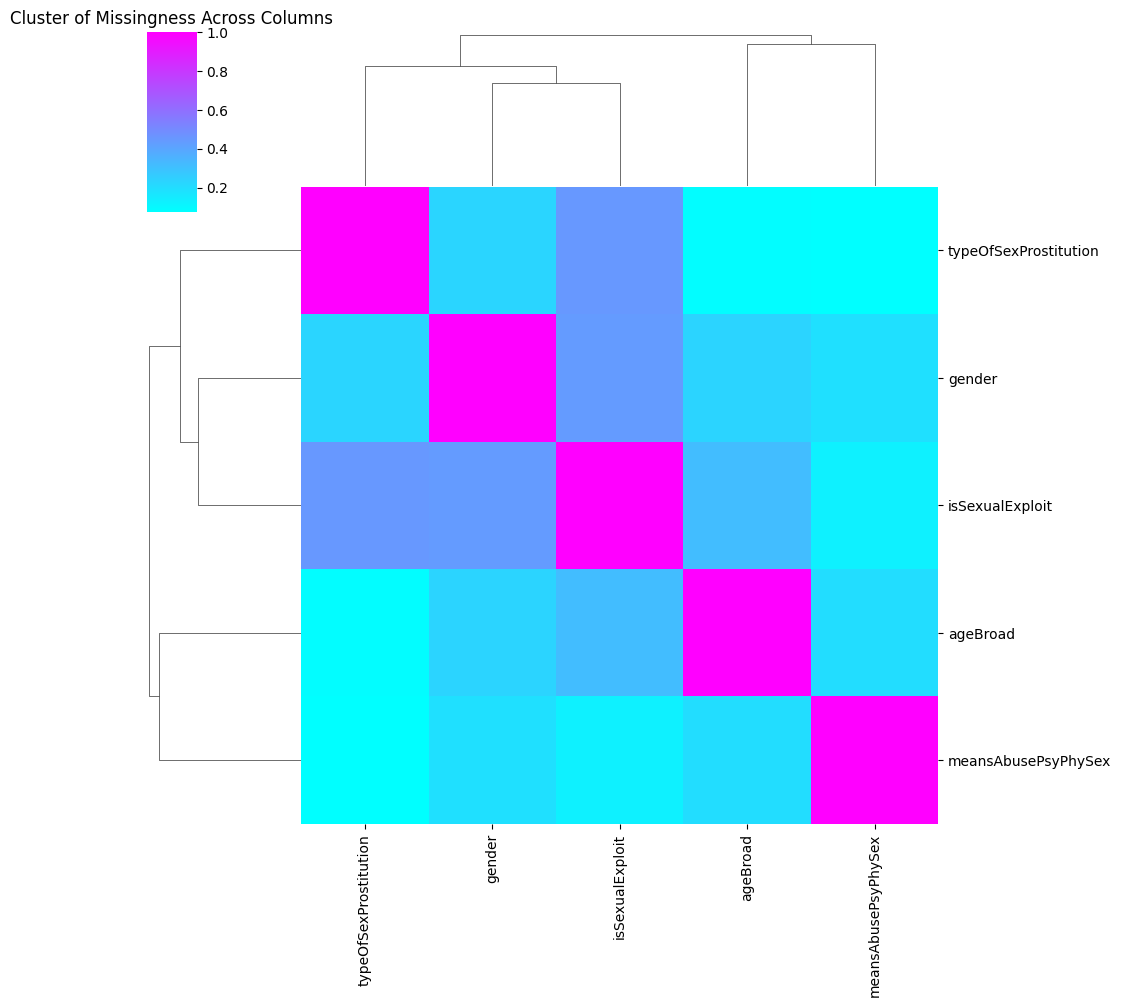

In [176]:
#  Let's visualize the matrix

sns.clustermap(missing_corr_cleaned, cmap='cool', figsize=(10,10))
plt.title('Cluster of Missingness Across Columns')
plt.show()

In [177]:
# How much data is missing in each row of the dataset?
# It's too big to print all of them, let's just see some stats.

missing_row_count = df_ml.isna().sum(axis=1)
print(missing_row_count.describe())

count    109412.000000
mean          2.635771
std           1.386369
min           0.000000
25%           2.000000
50%           2.000000
75%           4.000000
max           5.000000
dtype: float64


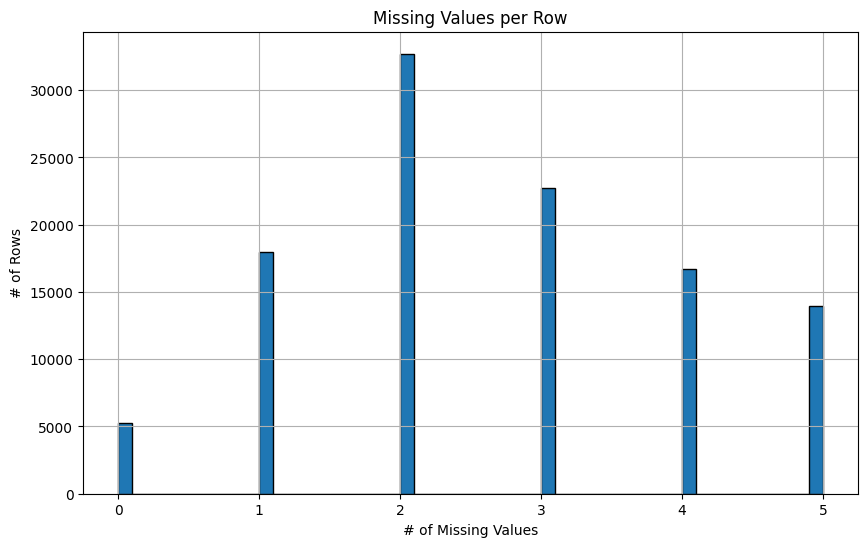

In [178]:
# Let's see it in a histogram

plt.figure(figsize=(10,6))
plt.hist(missing_row_count, bins=50, edgecolor='black')
plt.title('Missing Values per Row')
plt.xlabel('# of Missing Values')
plt.ylabel('# of Rows')
plt.grid(True)
plt.show()

This histogram is giving me some good information!  I know that my dataframe is down to 6 columns.  I also know that one of them is the Year of exploitation and that it contains no null values.  Meaning, all rows missing 5 values per row only contain the year and this will not be helpful to K-Means, and would actually hurt my results.  Similarly, a row missing 4 values will have the year and one additional data point which will add noise.  I am making the decision to drop rows with 4 and 5 missing values.

In [182]:
# Drop the rows with high missing values.

missing_row_count = df_ml.isna().sum(axis=1)

# Define the threshold of outliers
row_threshold = 3

# Calculate the missing percentage per row
missing_row = df_ml.isnull().sum(axis=1)

# Drop the rows that are higher than my row_threshold

df_ml = df_ml[missing_row <= row_threshold]

In [183]:
df_ml.shape

(78707, 6)

OK, we now have our dataset cleaned up and have eliminated excessive null values that would have distorted our final model.  

Let's begin looking at the features that will need re-encoded.

In [185]:
# How many features are there of each data type?

df_ml.dtypes.value_counts()

float64    3
object     2
int16      1
Name: count, dtype: int64

In [ ]:
# Assess categorical variables

columns_categorical = df_ml.select_dtypes(include=['object', 'category']).columns.tolist()  

for col in columns_categorical:
    if col in df_ml.columns:
        unique_vals = df_ml[col].dropna().unique()
        print(f"{col}: {len(unique_vals)} unique values: {unique_vals}")
    else:
        print(f"{col}: Not found in dataset")

gender: 3 unique values: ['Man' 'Woman' 'Trans/Transgender/NonConforming']
ageBroad: 9 unique values: ['30--38' '21--23' '24--26' '18--20' '09--17' '39--47' '27--29' '48+'
 '0--8']


With only 6 features, I am going to use one-hot encoding to clean up these 2 categorical variables so that K-Means can use them accurately.